# UnderSampling Techniques
- Random Under Sampling
- Cluster Centroids
- Tomek Links
- Edited Nearest Neighbours (ENN)
- Repeated ENN
- Near Miss

In [1]:
import warnings
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')
df_train = pd.read_csv('train.csv')

# Data Pre-processing
df_train['is_anomaly'] = np.where(df_train['is_anomaly'] == False, 0, 1) 
df_train["Is_anomaly"] = df_train['is_anomaly'].values

df_train.drop('is_anomaly', axis = 1 ,inplace = True)

X_train = df_train[['value','predicted']]
y_train = df_train['Is_anomaly']

df_train.head(10)

,timestamp,value,predicted,Is_anomaly
0,1425008573,42,44.072500,0
1,1425008873,41,50.709390,0
2,1425009173,41,81.405120,0
3,1425009473,61,39.950367,0
4,1425009773,44,35.350160,0
5,1425010073,27,27.713638,0
6,1425010373,37,41.545710,0
7,1425010673,36,38.743620,0
8,1425010973,49,40.859787,0
9,1425011273,36,25.444733,0


- Define plot functions

In [2]:
def plot_resampling(X, y, sampler, ax, title=None):
    X_res, y_res = sampler.fit_resample(X, y)
    ax.scatter(X_res[:, 0], X_res[:, 1], c=y_res, alpha=0.8, edgecolor="k")
    if title is None:
        title = f"Resampling with {sampler.__class__.__name__}"
    ax.set_title(title)
    sns.despine(ax=ax, offset=10)

In [3]:
def plot_decision_function(X, y, clf, ax, title=None):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step), copy = True
    )

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor="k")
    if title is not None:
        ax.set_title(title)

- Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

std_scaler = StandardScaler()
mmx_scaler = MinMaxScaler()
rob_scaler = RobustScaler()

# Create scaled datasets 
X_train_S = pd.DataFrame(std_scaler.fit_transform(X_train))
X_train_R = pd.DataFrame(rob_scaler.fit_transform(X_train))
X_train_M = pd.DataFrame(mmx_scaler.fit_transform(X_train))

- Under Sampling Techniques

In [5]:
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks, EditedNearestNeighbours, ClusterCentroids, RepeatedEditedNearestNeighbours

# Under Samplers 
rs           = RandomUnderSampler(sampling_strategy = 0.7, random_state = 99)
nearmiss     = NearMiss(sampling_strategy = 0.7, n_neighbors =5)
tomek        = TomekLinks(sampling_strategy = "not minority")
enn          = EditedNearestNeighbours(sampling_strategy = "not minority")
cluster_cen  = ClusterCentroids(sampling_strategy = 0.7, random_state = 99)
repeated_enn = RepeatedEditedNearestNeighbours(sampling_strategy = "not minority", max_iter = 500, n_neighbors =5)

# Fit Under Samplers with different Scaled Features 
# Random Under Samplers
X_rs_S, y_rs_S = rs.fit_resample(X_train_S, y_train)
X_rs_R, y_rs_R = rs.fit_resample(X_train_R, y_train)
X_rs_M, y_rs_M = rs.fit_resample(X_train_M, y_train)

# NearMiss Samplers
X_miss_S, y_miss_S = nearmiss.fit_resample(X_train_S, y_train)
X_miss_R, y_miss_R = nearmiss.fit_resample(X_train_R, y_train)
X_miss_M, y_miss_M = nearmiss.fit_resample(X_train_M, y_train)

# Tomek Samplers
X_tomek_S, y_tomek_S = tomek.fit_resample(X_train_S, y_train)
X_tomek_R, y_tomek_R = tomek.fit_resample(X_train_R, y_train)
X_tomek_M, y_tomek_M = tomek.fit_resample(X_train_M, y_train)

# ENN Samplers
X_enn_S, y_enn_S = enn.fit_resample(X_train_S, y_train)
X_enn_R, y_enn_R = enn.fit_resample(X_train_R, y_train)
X_enn_M, y_enn_M = enn.fit_resample(X_train_M, y_train)

# Repeated ENN Samplers
X_repeated_S, y_repeated_S = repeated_enn.fit_resample(X_train_S, y_train)
X_repeated_R, y_repeated_R = repeated_enn.fit_resample(X_train_R, y_train)
X_repeated_M, y_repeated_M = repeated_enn.fit_resample(X_train_M, y_train)

# Cluster Centroid Samplers
X_centroid_S, y_centroid_S = cluster_cen.fit_resample(X_train_S, y_train)
X_centroid_R, y_centroid_R = cluster_cen.fit_resample(X_train_R, y_train)
X_centroid_M, y_centroid_M = cluster_cen.fit_resample(X_train_M, y_train)

print('Classes before fit {}'.format(Counter(y_train)))
print('Classes after  Random Under Sampling (Standard Scaling) {}'.format(Counter(y_rs_S)))
print('Classes after  Random Under Sampling (Robust   Scaling) {}'.format(Counter(y_rs_R)))
print('Classes after  Random Under Sampling (Min-Max  Scaling) {}'.format(Counter(y_rs_M)))

print('Classes after  Near Miss (Standard Scaling) {}'.format(Counter(y_miss_S)))
print('Classes after  Near Miss (Robust   Scaling) {}'.format(Counter(y_miss_R)))
print('Classes after  Near Miss (Min-Max  Scaling) {}'.format(Counter(y_miss_M)))

print('Classes after  Tomek-Links (Standard Scaling) {}'.format(Counter(y_tomek_S)))
print('Classes after  Tomek-Links (Robust   Scaling) {}'.format(Counter(y_tomek_R)))
print('Classes after  Tomek-Links (Min-Max  Scaling) {}'.format(Counter(y_tomek_M)))

print('Classes after  ENN (Standard Scaling) {}'.format(Counter(y_enn_S)))
print('Classes after  ENN (Robust   Scaling) {}'.format(Counter(y_enn_R)))
print('Classes after  ENN (Min-Max  Scaling) {}'.format(Counter(y_enn_M)))

print('Classes after  Repeated ENN  (Standard Scaling) {}'.format(Counter(y_repeated_S)))
print('Classes after  Repeated ENN  (Robust   Scaling) {}'.format(Counter(y_repeated_R)))
print('Classes after  Repeated ENN  (Min-Max  Scaling) {}'.format(Counter(y_repeated_M)))

print('Classes after  Cluster Centroid (Standard Scaling) {}'.format(Counter(y_centroid_S)))
print('Classes after  Cluster Centroid (Robust   Scaling) {}'.format(Counter(y_centroid_R)))
print('Classes after  Cluster Centroid (Min-Max  Scaling) {}'.format(Counter(y_centroid_M)))

Classes before fit Counter({0: 15054, 1: 776})
Classes after  Random Under Sampling (Standard Scaling) Counter({0: 1108, 1: 776})
Classes after  Random Under Sampling (Robust   Scaling) Counter({0: 1108, 1: 776})
Classes after  Random Under Sampling (Min-Max  Scaling) Counter({0: 1108, 1: 776})
Classes after  Near Miss (Standard Scaling) Counter({0: 1108, 1: 776})
Classes after  Near Miss (Robust   Scaling) Counter({0: 1108, 1: 776})
Classes after  Near Miss (Min-Max  Scaling) Counter({0: 1108, 1: 776})
Classes after  Tomek-Links (Standard Scaling) Counter({0: 14880, 1: 776})
Classes after  Tomek-Links (Robust   Scaling) Counter({0: 14862, 1: 776})
Classes after  Tomek-Links (Min-Max  Scaling) Counter({0: 14880, 1: 776})
Classes after  ENN (Standard Scaling) Counter({0: 14415, 1: 776})
Classes after  ENN (Robust   Scaling) Counter({0: 14373, 1: 776})
Classes after  ENN (Min-Max  Scaling) Counter({0: 14409, 1: 776})
Classes after  Repeated ENN  (Standard Scaling) Counter({0: 13876, 1: 7

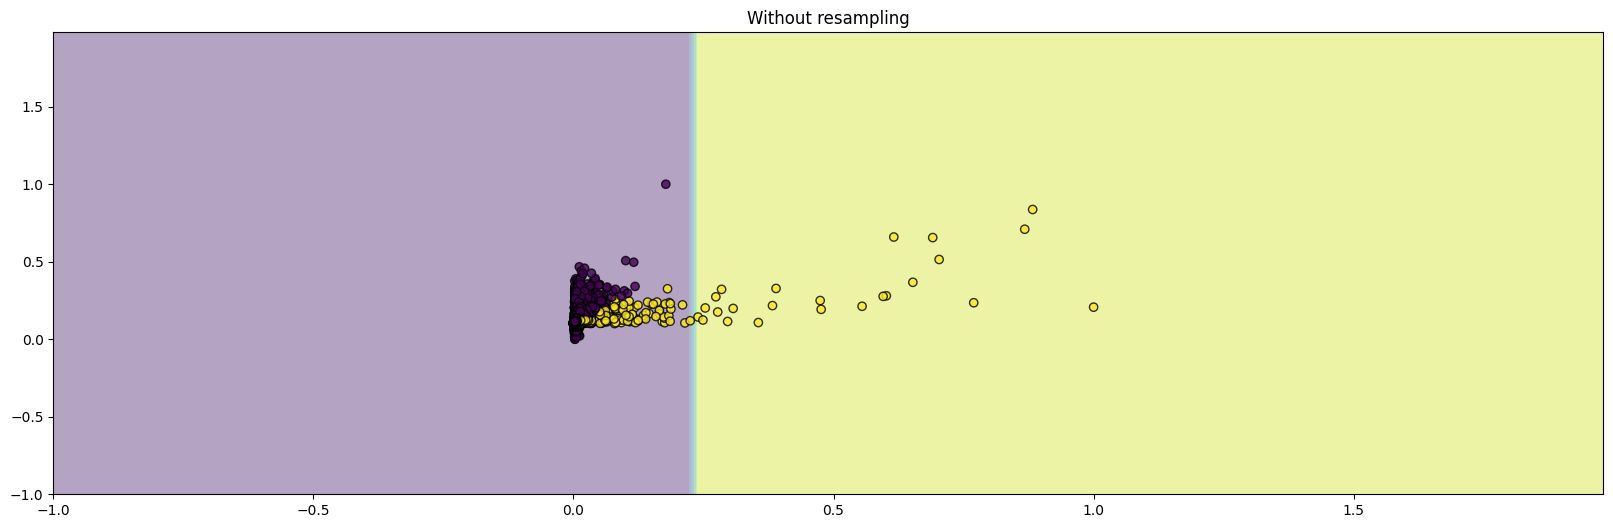

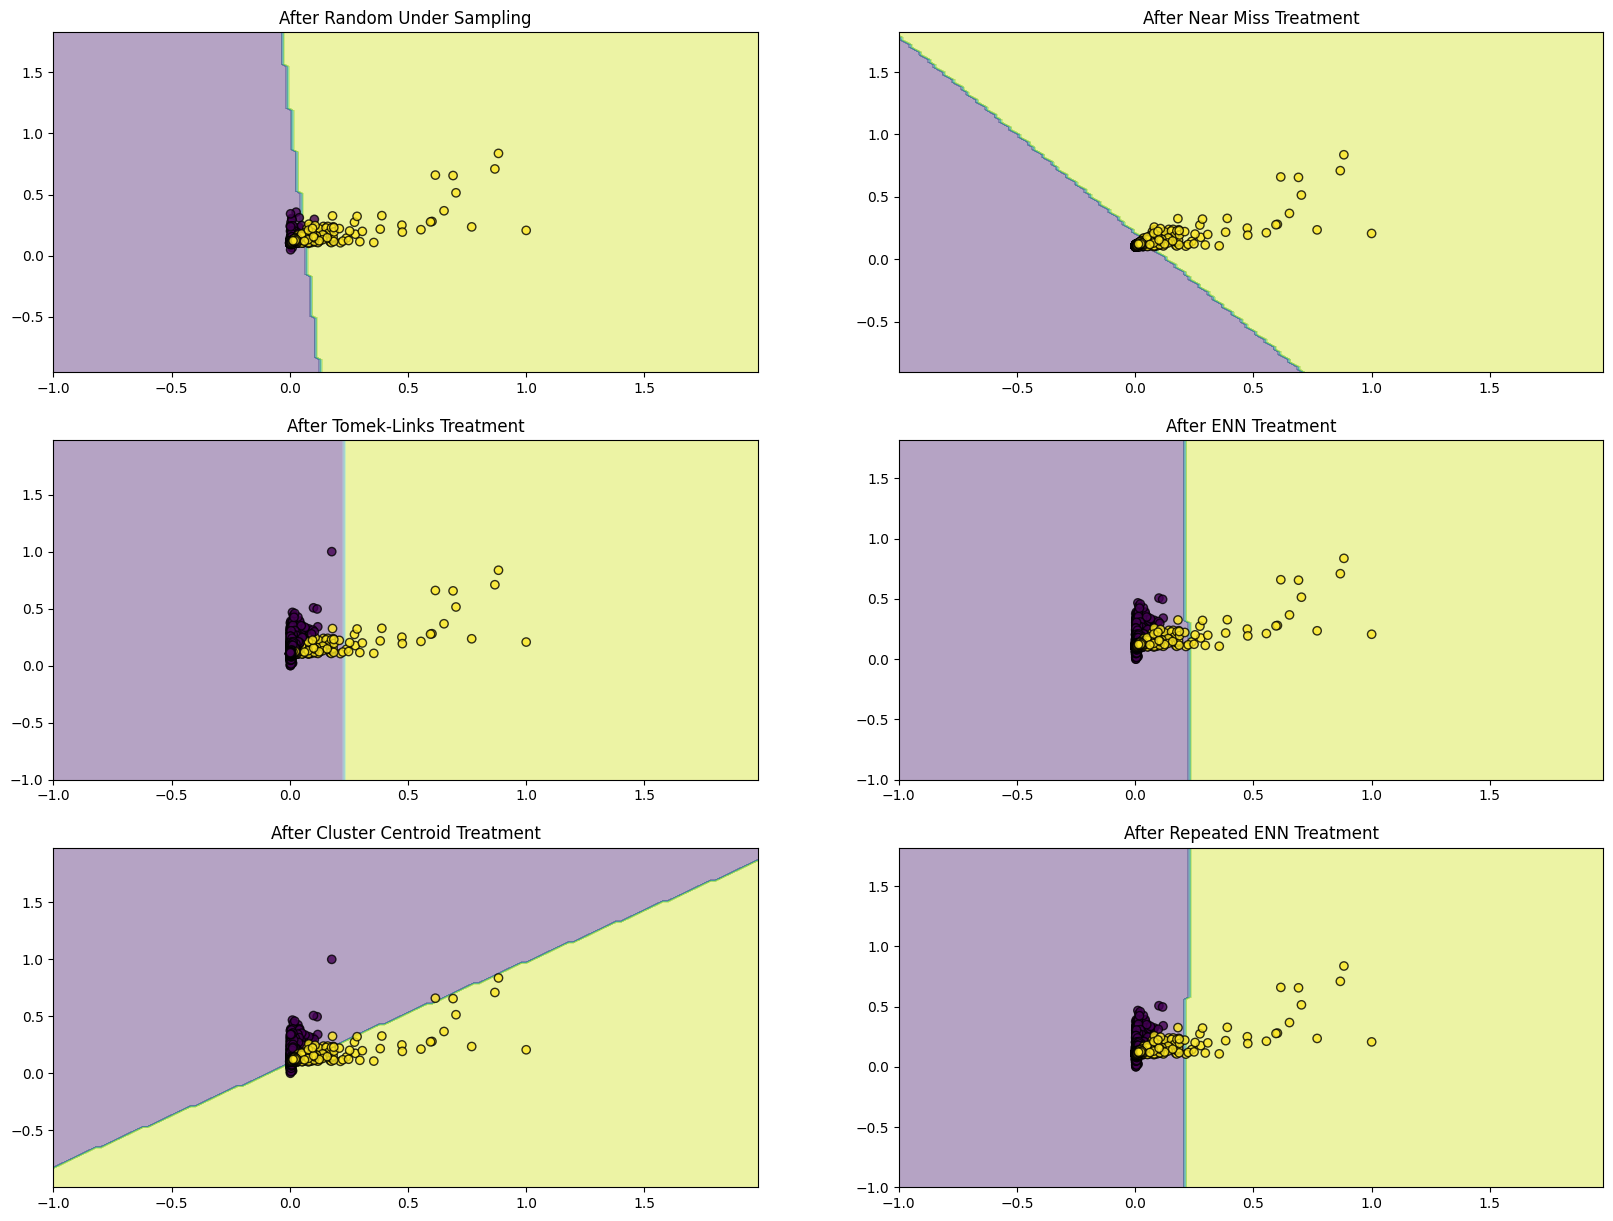

In [6]:
# Specify models - choose type of scaling (Min-Max Scaling)
model_Imbalanced  = LogisticRegression().fit(X_train_M, y_train)
model_RandomUnder = LogisticRegression().fit(X_rs_M, y_rs_M)
model_NearMiss    = LogisticRegression().fit(X_miss_M, y_miss_M)
model_Tomek       = LogisticRegression().fit(X_tomek_M, y_tomek_M)
model_ENN         = LogisticRegression().fit(X_enn_M, y_enn_M)
model_Cluster     = LogisticRegression().fit(X_centroid_M, y_centroid_M)
model_RepeatENN   = LogisticRegression().fit(X_repeated_M, y_repeated_M)

# Plot the models and their decision function
fig, ax = plt.subplots( figsize=(20, 6))
plot_decision_function(X_train_M.to_numpy(), y_train.to_numpy(), model_Imbalanced, ax, title="Without resampling")

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))
plot_decision_function(X_rs_M.to_numpy(), y_rs_M.to_numpy(), model_RandomUnder, axs[0,0], title="After Random Under Sampling")
plot_decision_function(X_miss_M.to_numpy(), y_miss_M.to_numpy(), model_NearMiss, axs[0,1], title="After Near Miss Treatment")

plot_decision_function(X_tomek_M.to_numpy(), y_tomek_M.to_numpy(), model_Tomek, axs[1,0], title="After Tomek-Links Treatment")
plot_decision_function(X_enn_M.to_numpy(), y_enn_M.to_numpy(), model_ENN, axs[1,1], title="After ENN Treatment")

plot_decision_function(X_centroid_M.to_numpy(), y_centroid_M.to_numpy(), model_Cluster, axs[2,0], title="After Cluster Centroid Treatment")
plot_decision_function(X_repeated_M.to_numpy(), y_repeated_M.to_numpy(), model_RepeatENN, axs[2,1], title="After Repeated ENN Treatment")
